# Sony Wireless Buds Review Analysis from website Headphonezone

### To get started with data
### Request library is imported and loaded to request data from a url

In [1]:
import requests

### Load the BeautifulSoup library ( a powerful tool for data extraction)

In [2]:
from bs4 import BeautifulSoup

In [3]:
r = requests.get('https://www.headphonezone.in/collections/all/products/sony-wf-xb700')

#### If the status code is 200 then it's working fine

In [4]:
r.status_code

200

## To retrieve all the textual data

In [5]:
r.text

'\n\n <!DOCTYPE html>\n<!--[if lt IE 7 ]><html class="ie ie6" lang="en"> <![endif]-->\n<!--[if IE 7 ]><html class="ie ie7" lang="en"> <![endif]-->\n<!--[if IE 8 ]><html class="ie ie8" lang="en"> <![endif]-->\n<!--[if IE 9 ]><html class="ie ie9" lang="en"> <![endif]-->\n<!--[if (gte IE 10)|!(IE)]><!--><html lang="en"> <!--<![endif]-->\n<head><meta content="qAY9FMW7UPBiY4GzsUGvQ4ktXb3wpTjcUWLB9T9OOQs" name="google-site-verification"/> <!-- Google Optimize Anti-flicker snippet (recommended) -->\n<!-- <style>.async-hide { opacity: 0 !important}</style>\n<script>(function(a,s,y,n,c,h,i,d,e){s.className+=\' \'+y;h.start=1*new Date;\nh.end=i=function(){s.className=s.className.replace(RegExp(\' ?\'+y),\'\')};\n(a[n]=a[n]||[]).hide=h;setTimeout(function(){i();h.end=null},c);h.timeout=c;\n})(window,document.documentElement,\'async-hide\',\'dataLayer\',4000,\n{\'GTM-P75GTR4\':true});</script> --> <!-- Google Tag Manager -->\n<script>\n    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({"gtm.start":

## To pull out HTML and XML files

In [7]:
soup = BeautifulSoup(r.text , 'html.parser')

### This is the most simple and yet important step. Go to the url whose data analysis you are supposed to do. 
### Inspect that page and in that div section find the most common class or uppermost class for review(in my  
### case) or your purpose.
### In my case that class is -  ' jdgm-rev'

In [16]:
soup.findAll(class_= 'jdgm-rev')

[<div class="jdgm-rev jdgm-divider-top" data-product-title="Sony - WF-XB700" data-product-url="/products/sony-wf-xb700" data-review-id="81873876-b9d4-4364-9f7f-d3a632d4504e" data-thumb-down-count="3" data-thumb-up-count="9" data-verified-buyer="true"> <div class="jdgm-rev__header"> <div class="jdgm-rev__icon"> A</div> <span aria-label="4 star review" class="jdgm-rev__rating" data-score="4" tabindex="0"> <a class="jdgm-star jdgm--on"></a><a class="jdgm-star jdgm--on"></a><a class="jdgm-star jdgm--on"></a><a class="jdgm-star jdgm--on"></a><a class="jdgm-star jdgm--off"></a></span> <span class="jdgm-rev__timestamp jdgm-spinner" data-content="2020-06-30 06:20:54 UTC"></span> <div class="jdgm-rev__br"></div> <span class="jdgm-rev__buyer-badge-wrapper"> <span class="jdgm-rev__buyer-badge"></span></span> <span class="jdgm-rev__author-wrapper" data-all-initials="A." data-fullname="Anmol" data-last-initial="Anmol" data-location-city="Gurgaon" data-location-country="India" data-location-country-

In [17]:
type(soup.findAll(class_= 'jdgm-rev'))

bs4.element.ResultSet

### So we are getting a result set.

In [18]:
divs = soup.findAll(class_= 'jdgm-rev')

### Q. How to deal with paragraph of extracted data ?

In [19]:
review = []
for div in divs:
    review.append(div.find('p').text)

In [20]:
review

["Well if you are looking for good wireless earbuds under 12k, it's best. And XB stands for extra bass. So people who like good base music, it's a gem of earbuds for them. Overall it sounds amazing and had a good range frequency and it got virtual assistant. And it last for good amount of time.",
 "I am using this for the past 1week. After putting it to use for so many hours.\nBass is another level.\nSound is so rich and deep. Theatre like experience.\nGood mids and highs. \nI used G buds plus as well.\nIt's so fun and energetic using xb 700. \nI am really satisfied with my purchase. \nYou won't get disappointed.",
 'Sony - WF-XB700',
 'I got them as replacement of Lypertek Tevi, they were just awful, just these... Damn they sound amazing, the bass just gets over your head, they are powerful, they sound powerful, wearing them for long hours is just too comfortable. Absolutely loved it... Hattss off to Sony',
 "The sound quality is what you'd expect of any Sony product. Quite good, slig

### So the result is obtained in paragraph.

In [21]:
len(divs)

9

### First review

In [22]:
review[1]

"I am using this for the past 1week. After putting it to use for so many hours.\nBass is another level.\nSound is so rich and deep. Theatre like experience.\nGood mids and highs. \nI used G buds plus as well.\nIt's so fun and energetic using xb 700. \nI am really satisfied with my purchase. \nYou won't get disappointed."

# Data Handling

In [23]:
import pandas as pd
import numpy as np

### Creating a dataframe of review as a numpy array and storing it in review column

In [25]:
df = pd.DataFrame(np.array(review), columns = ['review'])

### Reading first few rows and columns

In [26]:
df.head()

,review
0,Well if you are looking for good wireless earb...
1,I am using this for the past 1week. After putt...
2,Sony - WF-XB700
3,"I got them as replacement of Lypertek Tevi, th..."
4,The sound quality is what you'd expect of any ...


### Checking the data type of data

In [27]:
df.dtypes

review    object
dtype: object

### Checking if there are any null values

In [28]:
df.isnull().any()

review    False
dtype: bool

### Getting some information using describe method

In [29]:
df.describe()

,review
count,9
unique,9
top,As usual Sony has its own sound signature (ext...
freq,1


### Seeing how many reviews are there

In [30]:
len(df.review)

9

### Retrieving the length of each review

In [31]:
df['review'].apply(lambda x: len(x.split()))

0    56
1    60
2     3
3    47
4    31
5    20
6    28
7    49
8    30
Name: review, dtype: int64

### Counting how many words are there in each review

In [32]:
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [33]:
df['word_count']

0    56
1    60
2     3
3    47
4    31
5    20
6    28
7    49
8    30
Name: word_count, dtype: int64

### Seeing how many characters are there in each review

In [34]:
df['char_count'] = df['review'].apply(lambda x: len(x))

In [35]:
df['char_count']

0    293
1    313
2     15
3    274
4    161
5    116
6    164
7    269
8    177
Name: char_count, dtype: int64

### Calculating the average length of each review

In [40]:
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len (words)

In [41]:
df['review'].apply(lambda x : average_words(x))

0    4.250000
1    4.183333
2    4.333333
3    4.851064
4    4.225806
5    4.850000
6    4.892857
7    4.510204
8    4.933333
Name: review, dtype: float64

In [43]:
df['aver_word_len'] = df['review'].apply(lambda x : average_words(x))

In [44]:
df['aver_word_len']

0    4.250000
1    4.183333
2    4.333333
3    4.851064
4    4.225806
5    4.850000
6    4.892857
7    4.510204
8    4.933333
Name: aver_word_len, dtype: float64

# Stopwords
### A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore,
### both when indexing entries for searching and when retrieving them as the result of a search query.

In [45]:
from nltk.corpus import stopwords

In [46]:
stop_words = stopwords.words('english')

In [47]:
len(stop_words)

179

In [49]:
df['review'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

0    24
1    26
2     0
3    23
4    16
5     9
6    10
7    19
8    12
Name: review, dtype: int64

## Calculating the stopword count

In [50]:
df['stop_word_count'] = df['review'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

### Calculating the stopword rate

In [51]:
df ['stopword_rate'] = df['stop_word_count'] / df['word_count']

In [52]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333
2,Sony - WF-XB700,3,15,4.333333,0,0.000000
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129


In [53]:
df.describe()

,word_count,char_count,aver_word_len,stop_word_count,stopword_rate
count,9.000000,9.00000,9.000000,9.000000,9.000000
mean,36.000000,198.00000,4.558881,15.444444,0.384699
std,18.493242,97.62556,0.320644,8.486918,0.152389
min,3.000000,15.00000,4.183333,0.000000,0.000000
25%,28.000000,161.00000,4.250000,10.000000,0.387755
50%,31.000000,177.00000,4.510204,16.000000,0.428571
75%,49.000000,274.00000,4.851064,23.000000,0.450000
max,60.000000,313.00000,4.933333,26.000000,0.516129


### Sorting stopwords

In [54]:
df.sort_values(by = 'stopword_rate')

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate
2,Sony - WF-XB700,3,15,4.333333,0,0.000000
6,I got it for 8k in offer and I'm totally satis...,28,164,4.892857,10,0.357143
7,As usual Sony has its own sound signature (ext...,49,269,4.510204,19,0.387755
8,"It's a budget pair of earbuds. Great sound, gr...",30,177,4.933333,12,0.400000
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333
5,It's bass is just 'WOW'. Unlike others it's ba...,20,116,4.850000,9,0.450000
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129


### Installing and import the wordcloud library

In [58]:
! pip install wordcloud

## Importing libraries

In [59]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

## Importing warnings to deal with wordcloud libraries

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
# Start with one review:
text = df.review[0]

In [66]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

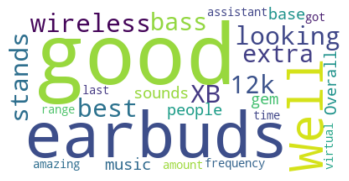

In [67]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
wordcloud.to_file("M:\\Headphonezone_Sony_Wireless_Bud_Review\\img\\first_review.png")

### Generating the word cloud for all reviews

In [71]:
text = " ".join(str(reviews) for reviews in df.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1790 words in the combination of all review.


In [72]:
stopwords = set(STOPWORDS)

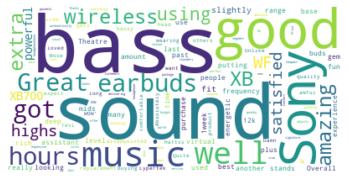

In [73]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Saving the image

In [74]:
wordcloud.to_file("M:\\Headphonezone_Sony_Wireless_Bud_Review\\img\\review.png")

# Data Cleaning

### Converting the review text to lowercase

In [76]:
df['review'].apply(lambda x: " " .join(word.lower() for word in x.split())) 

0    well if you are looking for good wireless earb...
1    i am using this for the past 1week. after putt...
2                                      sony - wf-xb700
3    i got them as replacement of lypertek tevi, th...
4    the sound quality is what you'd expect of any ...
5    it's bass is just 'wow'. unlike others it's ba...
6    i got it for 8k in offer and i'm totally satis...
7    as usual sony has its own sound signature (ext...
8    it's a budget pair of earbuds. great sound, gr...
Name: review, dtype: object

In [77]:
df['review']

0    Well if you are looking for good wireless earb...
1    I am using this for the past 1week. After putt...
2                                      Sony - WF-XB700
3    I got them as replacement of Lypertek Tevi, th...
4    The sound quality is what you'd expect of any ...
5    It's bass is just 'WOW'. Unlike others it's ba...
6    I got it for 8k in offer and I'm totally satis...
7    As usual Sony has its own sound signature (ext...
8    It's a budget pair of earbuds. Great sound, gr...
Name: review, dtype: object

In [78]:
df['lowercase'] = df['review'].apply(lambda x: " " .join(word.lower() for word in x.split())) 

In [82]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,lowercase
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well if you are looking for good wireless earb...
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,i am using this for the past 1week. after putt...
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony - wf-xb700
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,"i got them as replacement of lypertek tevi, th..."
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,the sound quality is what you'd expect of any ...


In [83]:
df['lowercase']

0    well if you are looking for good wireless earb...
1    i am using this for the past 1week. after putt...
2                                      sony - wf-xb700
3    i got them as replacement of lypertek tevi, th...
4    the sound quality is what you'd expect of any ...
5    it's bass is just 'wow'. unlike others it's ba...
6    i got it for 8k in offer and i'm totally satis...
7    as usual sony has its own sound signature (ext...
8    it's a budget pair of earbuds. great sound, gr...
Name: lowercase, dtype: object

### Removing punctuation

In [85]:
df['punctuation'] = df['lowercase'].str.replace('[^\w\s]', ' ')

In [86]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,lowercase,punctuation
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well if you are looking for good wireless earb...,well if you are looking for good wireless earb...
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,i am using this for the past 1week. after putt...,i am using this for the past 1week after putt...
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony - wf-xb700,sony wf xb700
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,"i got them as replacement of lypertek tevi, th...",i got them as replacement of lypertek tevi th...
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,the sound quality is what you'd expect of any ...,the sound quality is what you d expect of any ...


In [87]:
df['punctuation'].apply(lambda x : " " .join(word for word in x.split() if word not in stop_words) )

0    well looking good wireless earbuds 12k best xb...
1    using past 1week putting use many hours bass a...
2                                        sony wf xb700
3    got replacement lypertek tevi awful damn sound...
4    sound quality expect sony product quite good s...
5    bass wow unlike others bass automatically adju...
6    got 8k offer totally satisfied deal music call...
7    usual sony sound signature extra bass new wf x...
8    budget pair earbuds great sound great bass son...
Name: punctuation, dtype: object

In [88]:
df['stopwords'] = df['punctuation'].apply(lambda x : " " .join(word for word in x.split() if word not in stop_words) )

In [89]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,lowercase,punctuation,stopwords
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well if you are looking for good wireless earb...,well if you are looking for good wireless earb...,well looking good wireless earbuds 12k best xb...
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,i am using this for the past 1week. after putt...,i am using this for the past 1week after putt...,using past 1week putting use many hours bass a...
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony - wf-xb700,sony wf xb700,sony wf xb700
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,"i got them as replacement of lypertek tevi, th...",i got them as replacement of lypertek tevi th...,got replacement lypertek tevi awful damn sound...
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,the sound quality is what you'd expect of any ...,the sound quality is what you d expect of any ...,sound quality expect sony product quite good s...


In [95]:
pd.Series(" ".join(df['stopwords']).split()).value_counts()[:50]

bass             9
sound            7
good             7
sony             6
music            4
well             3
earbuds          3
hours            3
got              3
great            3
xb               2
wf               2
slightly         2
powerful         2
wireless         2
highs            2
satisfied        2
using            2
like             2
extra            2
xb700            2
amazing          2
true             1
base             1
absolute         1
time             1
usual            1
automatically    1
adjusts          1
last             1
g                1
putting          1
damn             1
awful            1
segment          1
1week            1
offer            1
deep             1
overall          1
head             1
theatre          1
disappointed     1
comfortable      1
price            1
quality          1
headphonezone    1
get              1
perfect          1
energetic        1
gem              1
dtype: int64

In [93]:
len(pd.Series(" ".join(df['stopwords']).split()).value_counts())

131

### Adding our own stopwords which might not be useful

In [97]:
other_stop_words = ['base' , 'adjusts' , 'extra' , 'using' , 'got' , 'gem' , 'energetic' , 'deep' , 'segment' , 'g'\
                    , 'usual' , 'get' , 'putting']

In [98]:
len(other_stop_words)

13

In [100]:
df['stopwords'].apply(lambda x : " " .join(word for word in x.split() if word not in other_stop_words))

0    well looking good wireless earbuds 12k best xb...
1    past 1week use many hours bass another level s...
2                                        sony wf xb700
3    replacement lypertek tevi awful damn sound ama...
4    sound quality expect sony product quite good s...
5    bass wow unlike others bass automatically acco...
6    8k offer totally satisfied deal music calls ev...
7    sony sound signature bass new wf xb700 good ba...
8    budget pair earbuds great sound great bass son...
Name: stopwords, dtype: object

In [101]:
df['cleanreview'] = df['stopwords'].apply(lambda x : " " .join(word for word in x.split() if word not in other_stop_words))

In [102]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,lowercase,punctuation,stopwords,cleanreview
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well if you are looking for good wireless earb...,well if you are looking for good wireless earb...,well looking good wireless earbuds 12k best xb...,well looking good wireless earbuds 12k best xb...
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,i am using this for the past 1week. after putt...,i am using this for the past 1week after putt...,using past 1week putting use many hours bass a...,past 1week use many hours bass another level s...
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony - wf-xb700,sony wf xb700,sony wf xb700,sony wf xb700
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,"i got them as replacement of lypertek tevi, th...",i got them as replacement of lypertek tevi th...,got replacement lypertek tevi awful damn sound...,replacement lypertek tevi awful damn sound ama...
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,the sound quality is what you'd expect of any ...,the sound quality is what you d expect of any ...,sound quality expect sony product quite good s...,sound quality expect sony product quite good s...


# Lemmatization
### Lemmatization is the process of grouping together the different inflected forms of a word so they can be 
### analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.
### So it links words with similar meaning to one word.

In [103]:
from textblob import Word

In [114]:
df['lemmatized'] = df['cleanreview'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

# Sentiment Analysis

### importing TextBlob library for Sentiment Analysis

In [115]:
from textblob import TextBlob

In [119]:
df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

0    0.465000
1    0.178500
2    0.000000
3    0.190000
4    0.311111
5   -0.008000
6    0.566667
7    0.157851
8    0.464286
Name: lemmatized, dtype: float64

In [120]:
df['polarity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])

In [121]:
df['subjectity'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [122]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,lowercase,punctuation,stopwords,cleanreview,lemmatized,polarity,subjectity
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well if you are looking for good wireless earb...,well if you are looking for good wireless earb...,well looking good wireless earbuds 12k best xb...,well looking good wireless earbuds 12k best xb...,well looking good wireless earbuds 12k best xb...,0.465000,0.456667
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,i am using this for the past 1week. after putt...,i am using this for the past 1week after putt...,using past 1week putting use many hours bass a...,past 1week use many hours bass another level s...,past 1week use many hour bass another level so...,0.178500,0.549000
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony - wf-xb700,sony wf xb700,sony wf xb700,sony wf xb700,sony wf xb700,0.000000,0.000000
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,"i got them as replacement of lypertek tevi, th...",i got them as replacement of lypertek tevi th...,got replacement lypertek tevi awful damn sound...,replacement lypertek tevi awful damn sound ama...,replacement lypertek tevi awful damn sound ama...,0.190000,0.720000
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,the sound quality is what you'd expect of any ...,the sound quality is what you d expect of any ...,sound quality expect sony product quite good s...,sound quality expect sony product quite good s...,sound quality expect sony product quite good s...,0.311111,0.388889


In [123]:
df.describe()

,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,polarity,subjectity
count,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,36.000000,198.00000,4.558881,15.444444,0.384699,0.258379,0.502749
std,18.493242,97.62556,0.320644,8.486918,0.152389,0.206698,0.221688
min,3.000000,15.00000,4.183333,0.000000,0.000000,-0.008000,0.000000
25%,28.000000,161.00000,4.250000,10.000000,0.387755,0.157851,0.456667
50%,31.000000,177.00000,4.510204,16.000000,0.428571,0.190000,0.549000
75%,49.000000,274.00000,4.851064,23.000000,0.450000,0.464286,0.635714
max,60.000000,313.00000,4.933333,26.000000,0.516129,0.566667,0.733333


In [128]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,lowercase,punctuation,stopwords,cleanreview,lemmatized,polarity,subjectity
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well if you are looking for good wireless earb...,well if you are looking for good wireless earb...,well looking good wireless earbuds 12k best xb...,well looking good wireless earbuds 12k best xb...,well looking good wireless earbuds 12k best xb...,0.465000,0.456667
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,i am using this for the past 1week. after putt...,i am using this for the past 1week after putt...,using past 1week putting use many hours bass a...,past 1week use many hours bass another level s...,past 1week use many hour bass another level so...,0.178500,0.549000
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony - wf-xb700,sony wf xb700,sony wf xb700,sony wf xb700,sony wf xb700,0.000000,0.000000
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,"i got them as replacement of lypertek tevi, th...",i got them as replacement of lypertek tevi th...,got replacement lypertek tevi awful damn sound...,replacement lypertek tevi awful damn sound ama...,replacement lypertek tevi awful damn sound ama...,0.190000,0.720000
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,the sound quality is what you'd expect of any ...,the sound quality is what you d expect of any ...,sound quality expect sony product quite good s...,sound quality expect sony product quite good s...,sound quality expect sony product quite good s...,0.311111,0.388889


In [129]:
df.drop(columns = ['lowercase' , 'punctuation', 'stopwords', 'lemmatized'] , inplace = True)

In [130]:
df.head()

,review,word_count,char_count,aver_word_len,stop_word_count,stopword_rate,cleanreview,polarity,subjectity
0,Well if you are looking for good wireless earb...,56,293,4.250000,24,0.428571,well looking good wireless earbuds 12k best xb...,0.465000,0.456667
1,I am using this for the past 1week. After putt...,60,313,4.183333,26,0.433333,past 1week use many hours bass another level s...,0.178500,0.549000
2,Sony - WF-XB700,3,15,4.333333,0,0.000000,sony wf xb700,0.000000,0.000000
3,"I got them as replacement of Lypertek Tevi, th...",47,274,4.851064,23,0.489362,replacement lypertek tevi awful damn sound ama...,0.190000,0.720000
4,The sound quality is what you'd expect of any ...,31,161,4.225806,16,0.516129,sound quality expect sony product quite good s...,0.311111,0.388889


In [131]:
text = df.review[0]

In [132]:
wordcloud = WordCloud(background_color="white").generate(text)

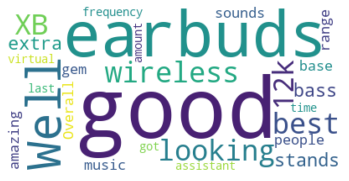

In [133]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [134]:
wordcloud.to_file("M:\\Headphonezone_Sony_Wireless_Bud_Review\\img\\first_review_clean.png")

In [135]:
text = " ".join(str(reviews) for reviews in df.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1790 words in the combination of all review.


In [136]:
stopwords = set(STOPWORDS)

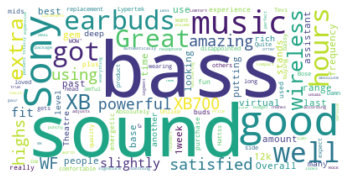

In [137]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [138]:
wordcloud.to_file("M:\\Headphonezone_Sony_Wireless_Bud_Review\\img\\cleanreview.png")

### Saving the file as a csv

In [139]:
df.to_csv('M:\\Headphonezone_Sony_Wireless_Bud_Review\\img\\Headphonze_Sony_WirelessBud_Review.csv') 